# 🦟 Análisis de Dengue Grave en Población Pediátrica - Perú

---

## 📌 Assignment 4: Becoming an Independent Data Scientist

**Applied Plotting, Charting & Data Representation in Python** del programa **Data Science with Python Specialization** | University of Michigan - Coursera

---

### 🎯 Pregunta de Investigación

> **¿Cómo ha evolucionado la proporción de casos graves de dengue entre niños (0–14 años) en las regiones más afectadas de Perú a lo largo del tiempo?**

---

### 📊 Información del Proyecto

| Aspecto                    | Detalle                                          |
| -------------------------- | ------------------------------------------------ |
| **🌎 Región**              | Perú                                             |
| **🏥 Dominio**             | Salud Pública / Epidemiología Pediátrica         |
| **📅 Periodo de Análisis** | 2015 - 2024                                      |
| **👶 Población Objetivo**  | Niños de 0 a 14 años                             |
| **🔬 Enfermedad**          | Dengue (enfoque en casos graves - CIE-10: A97.2) |

---

### 📁 Fuente de Datos

**Dataset**: Vigilancia Epidemiológica de Dengue - Datos Abiertos Perú

🔗 [https://www.datosabiertos.gob.pe/dataset/vigilancia-epidemiológica-de-dengue](https://www.datosabiertos.gob.pe/dataset/vigilancia-epidemiológica-de-dengue)

**Características del dataset**:

- Datos de vigilancia epidemiológica del Ministerio de Salud del Perú
- Periodo completo: 2008-2024
- Variables: departamento, edad, tipo de edad, diagnóstico CIE-10, año de notificación
- Formato: CSV (separador: punto y coma)

---

### 🎨 Principios de Diseño (Alberto Cairo)

Este análisis y visualización están fundamentados en los principios de:

- ✅ **Truthfulness (Verdad)**: Uso de proporciones para comparaciones justas entre regiones
- ✅ **Functionality (Funcionalidad)**: Gráficos apropiados para identificar tendencias temporales
- ✅ **Beauty (Belleza)**: Diseño limpio y minimalista
- ✅ **Insightfulness (Insight)**: Identificación clara de patrones, anomalías y contrastes regionales

---


In [1]:
import pandas as pd
import numpy as np

# Cargar datos desde un archivo CSV, teniendo en cuenta que hay un encabezado
df = pd.read_csv('data/datos_abiertos_vigilancia_dengue_2008_2024.csv', sep=';', header=0, encoding='utf-8', low_memory=False)

# Mostrar las primeras filas del DataFrame
df.head()

,departamento,provincia,distrito,localidad,enfermedad,ano,semana,diagnostic,diresa,ubigeo,localcod,edad,tipo_edad,sexo
0,AMAZONAS,BAGUA,ARAMANGO,ARAMANGO,DENGUE SIN SIGNOS DE ALARMA,2008,1,A97.0,36.0,10202,0102020001,23,A,M
1,AMAZONAS,BAGUA,ARAMANGO,ARAMANGO,DENGUE SIN SIGNOS DE ALARMA,2008,1,A97.0,36.0,10202,0102020001,23,A,M
2,AMAZONAS,UTCUBAMBA,BAGUA GRANDE,BAGUA GRANDE,DENGUE SIN SIGNOS DE ALARMA,2008,1,A97.0,36.0,10701,0107010001,52,A,F
3,AMAZONAS,UTCUBAMBA,BAGUA GRANDE,LA VICTORIA,DENGUE SIN SIGNOS DE ALARMA,2008,1,A97.0,36.0,10701,0107010003,27,A,F
4,AMAZONAS,UTCUBAMBA,BAGUA GRANDE,BAGUA GRANDE,DENGUE SIN SIGNOS DE ALARMA,2008,1,A97.0,36.0,10701,0107010001,47,A,F


In [2]:
# Filtrar datos de años 2015 a 2024
df_2015_2024 = df[(df['ano'] >= 2015) & (df['ano'] <= 2024)].copy()
df_2015_2024.head()

,departamento,provincia,distrito,localidad,enfermedad,ano,semana,diagnostic,diresa,ubigeo,localcod,edad,tipo_edad,sexo
129987,CAJAMARCA,JAEN,JAEN,JAEN,DENGUE CON SIGNOS DE ALARMA,2015,1,A97.1,38.0,60801,0608010001,36,A,F
129988,HUANUCO,LEONCIO PRADO,MARIANO DAMASO BERAUN,BELLA,DENGUE SIN SIGNOS DE ALARMA,2015,1,A97.0,10.0,100606,1006060008,23,A,M
129989,JUNIN,CHANCHAMAYO,PERENE,SATELITE,DENGUE SIN SIGNOS DE ALARMA,2015,1,A97.0,12.0,120302,1203020100,62,A,F
129990,JUNIN,CHANCHAMAYO,PICHANAQUI,NaN,DENGUE SIN SIGNOS DE ALARMA,2015,1,A97.0,12.0,120303,NaN,16,A,M
129991,JUNIN,CHANCHAMAYO,PICHANAQUI,BAJO PICHANAQUI,DENGUE CON SIGNOS DE ALARMA,2015,1,A97.1,12.0,120303,1203030001,15,A,M


In [3]:
# Crear una nueva columna 'edad_en_anios' convirtiendo 'edad' de días y meses a años
df_2015_2024['edad_en_anios'] = np.select(
    [
        df_2015_2024['tipo_edad'] == 'D',
        df_2015_2024['tipo_edad'] == 'M',
        df_2015_2024['tipo_edad'] == 'A'
    ],
    [
        df_2015_2024['edad'] / 365,
        df_2015_2024['edad'] / 12,
        df_2015_2024['edad']
    ],
    default=np.nan
)
df_2015_2024.head()

,departamento,provincia,distrito,localidad,enfermedad,ano,semana,diagnostic,diresa,ubigeo,localcod,edad,tipo_edad,sexo,edad_en_anios
129987,CAJAMARCA,JAEN,JAEN,JAEN,DENGUE CON SIGNOS DE ALARMA,2015,1,A97.1,38.0,60801,0608010001,36,A,F,36.0
129988,HUANUCO,LEONCIO PRADO,MARIANO DAMASO BERAUN,BELLA,DENGUE SIN SIGNOS DE ALARMA,2015,1,A97.0,10.0,100606,1006060008,23,A,M,23.0
129989,JUNIN,CHANCHAMAYO,PERENE,SATELITE,DENGUE SIN SIGNOS DE ALARMA,2015,1,A97.0,12.0,120302,1203020100,62,A,F,62.0
129990,JUNIN,CHANCHAMAYO,PICHANAQUI,NaN,DENGUE SIN SIGNOS DE ALARMA,2015,1,A97.0,12.0,120303,NaN,16,A,M,16.0
129991,JUNIN,CHANCHAMAYO,PICHANAQUI,BAJO PICHANAQUI,DENGUE CON SIGNOS DE ALARMA,2015,1,A97.1,12.0,120303,1203030001,15,A,M,15.0


In [4]:
# Filtrar niños de 0 a 14 años
df_menores_14 = df_2015_2024[df_2015_2024['edad_en_anios'] <= 14].copy()
df_menores_14.head()

,departamento,provincia,distrito,localidad,enfermedad,ano,semana,diagnostic,diresa,ubigeo,localcod,edad,tipo_edad,sexo,edad_en_anios
130000,LAMBAYEQUE,CHICLAYO,PUCALA,PUCALA,DENGUE SIN SIGNOS DE ALARMA,2015,1,A97.0,14.0,140119,1401190001,8,A,M,8.0
130004,LAMBAYEQUE,FERRE�AFE,PITIPO,BATAN GRANDE,DENGUE SIN SIGNOS DE ALARMA,2015,1,A97.0,14.0,140205,1402050027,9,A,M,9.0
130007,LORETO,ALTO AMAZONAS,YURIMAGUAS,YURIMAGUAS,DENGUE SIN SIGNOS DE ALARMA,2015,1,A97.0,16.0,160201,1602010001,5,A,M,5.0
130009,LORETO,ALTO AMAZONAS,YURIMAGUAS,YURIMAGUAS,DENGUE SIN SIGNOS DE ALARMA,2015,1,A97.0,16.0,160201,1602010001,14,A,F,14.0
130012,LORETO,ALTO AMAZONAS,YURIMAGUAS,YURIMAGUAS,DENGUE CON SIGNOS DE ALARMA,2015,1,A97.1,16.0,160201,1602010001,5,A,M,5.0


In [5]:
# Agrupar casos de dengue por año y departamento
casos_por_ano_departamento = df_menores_14.groupby(['ano', 'departamento']).size().reset_index(name='casos_dengue')

# Filtar los departamentos con más casos en total
total_casos_por_departamento = casos_por_ano_departamento.groupby('departamento')['casos_dengue'].sum().reset_index()
departamentos_top = total_casos_por_departamento.sort_values(by='casos_dengue', ascending=False).head(5)['departamento']
casos_por_ano_departamento_top = casos_por_ano_departamento[casos_por_ano_departamento['departamento'].isin(departamentos_top)]
casos_por_ano_departamento_top.head()

,ano,departamento,casos_dengue
8,2015,LA LIBERTAD,348
10,2015,LIMA,1
11,2015,LORETO,457
14,2015,PIURA,4640
17,2015,UCAYALI,88


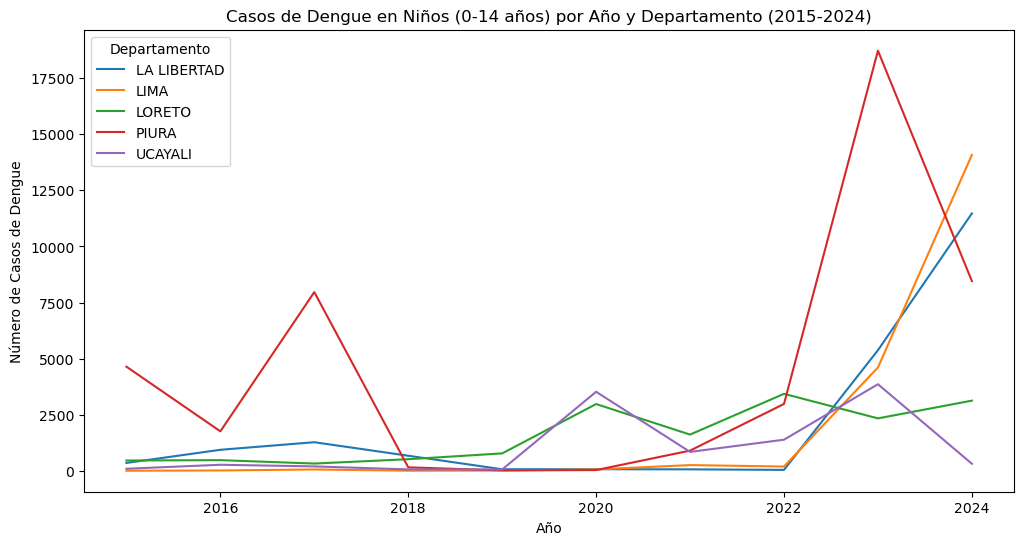

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar los casos de dengue por año para los departamentos con más casos
plt.figure(figsize=(12, 6))
sns.lineplot(data=casos_por_ano_departamento_top, x='ano', y='casos_dengue', hue='departamento')
plt.title('Casos de Dengue en Niños (0-14 años) por Año y Departamento (2015-2024)')
plt.xlabel('Año')
plt.ylabel('Número de Casos de Dengue')
plt.legend(title='Departamento')
plt.show()

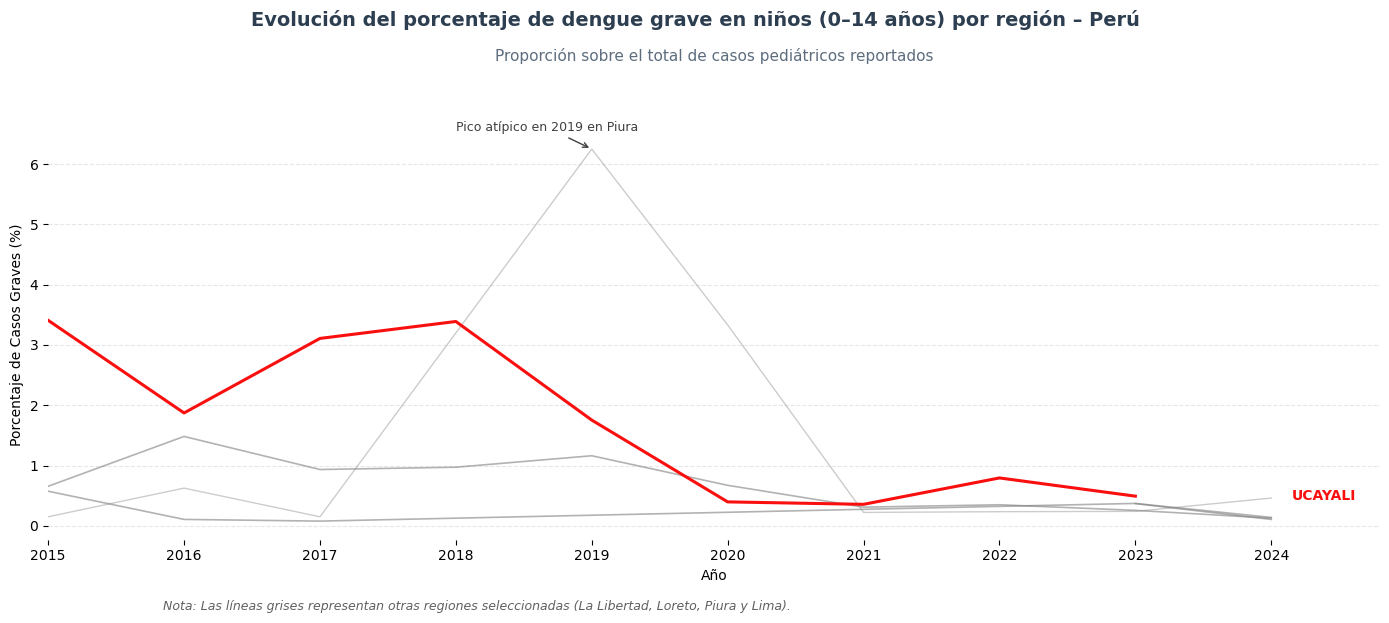

In [8]:
# Mostrar gráfico de departamentos con porcentaje de casos graves por año
casos_graves_por_ano_departamento = df_menores_14[df_menores_14['diagnostic'] == 'A97.2'].groupby(['ano', 'departamento']).size().reset_index(name='casos_graves')
casos_totales_por_ano_departamento = df_menores_14.groupby(['ano', 'departamento']).size().reset_index(name='casos_totales')
casos_porcentaje_graves = pd.merge(casos_graves_por_ano_departamento, casos_totales_por_ano_departamento, on=['ano', 'departamento'])
casos_porcentaje_graves['porcentaje_graves'] = (casos_porcentaje_graves['casos_graves'] / casos_porcentaje_graves['casos_totales']) * 100
casos_porcentaje_graves_top = casos_porcentaje_graves[casos_porcentaje_graves['departamento'].isin(departamentos_top)]

# Encontrar el departamento con mayor porcentaje promedio
promedio_por_depto = casos_porcentaje_graves_top.groupby('departamento')['porcentaje_graves'].mean()
depto_mayor = promedio_por_depto.idxmax()

plt.figure(figsize=(14, 6))
pico_piura_valor = None
pico_piura_ano = 2019

for depto in casos_porcentaje_graves_top['departamento'].unique():
    data_depto = casos_porcentaje_graves_top[casos_porcentaje_graves_top['departamento'] == depto]
    if depto == depto_mayor:
        plt.plot(data_depto['ano'], data_depto['porcentaje_graves'], color="#FA0F0F", linewidth=2.2)
        # Agregar etiqueta al final de la línea
        ultimo_punto = data_depto[data_depto['ano'] == 2023]
        if not ultimo_punto.empty:
            plt.text(2024.15, ultimo_punto['porcentaje_graves'].values[0], depto, 
                    va='center', ha='left', color='#FA0F0F', fontweight='bold', fontsize=10)
    elif depto == 'PIURA':
        plt.plot(data_depto['ano'], data_depto['porcentaje_graves'], color='gray', linewidth=1, alpha=0.4)
    else:
        plt.plot(data_depto['ano'], data_depto['porcentaje_graves'], color='gray', linewidth=1.2, alpha=0.6)
    
    # Buscar el pico de PIURA en 2019
    if depto == 'PIURA':
        punto_2019 = data_depto[data_depto['ano'] == 2019]
        if not punto_2019.empty:
            pico_piura_valor = punto_2019['porcentaje_graves'].values[0]
            pico_piura_ano = 2019

# Añadir anotación en el pico de PIURA 2019
if pico_piura_valor is not None:
    plt.annotate('Pico atípico en 2019 en Piura', 
                xy=(pico_piura_ano, pico_piura_valor), 
                xytext=(pico_piura_ano - 1, pico_piura_valor + 0.3),
                fontsize=9,
                color='#404040',
                arrowprops={'arrowstyle': '->', 'color': '#404040', 'lw': 1})

plt.suptitle('Evolución del porcentaje de dengue grave en niños (0–14 años) por región – Perú', 
             fontsize=14, fontweight='bold', color='#2C3E50', y=0.98)
plt.title('Proporción sobre el total de casos pediátricos reportados', 
          fontsize=11, color='#5D6D7E', pad=50)
plt.xlabel('Año')
plt.ylabel('Porcentaje de Casos Graves (%)')
plt.xticks(range(2015, 2025))
plt.xlim(2015, 2024.8)  # Dar espacio para las etiquetas
plt.grid(True, alpha=0.3, axis='y', linestyle='--')  # Líneas punteadas

# Cambiar color del contorno
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_color('darkgray')
    spine.set_linewidth(0)

plt.tight_layout()

# Añadir nota explicativa (después de tight_layout)
plt.figtext(0.12, -0.02, 'Nota: Las líneas grises representan otras regiones seleccionadas (La Libertad, Loreto, Piura y Lima).', 
            fontsize=9, color='#606060', style='italic')

# Guardar la figura
plt.savefig('dengue_grave_pediatrico_departamentos_top.png', dpi=300, bbox_inches='tight')

plt.show()